# Employee Attrition Prediction

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smi
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

### Data Preprocesing

In [2]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/Employee Attrition.csv')
df.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [4]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [5]:
df.mean()

Emp ID                   7500.000000
satisfaction_level          0.612834
last_evaluation             0.716102
number_project              3.803054
average_montly_hours      201.050337
time_spend_company          3.498233
Work_accident               0.144610
promotion_last_5years       0.021268
dtype: float64

In [6]:
df.median()

Emp ID                   7500.00
satisfaction_level          0.64
last_evaluation             0.72
number_project              4.00
average_montly_hours      200.00
time_spend_company          3.00
Work_accident               0.00
promotion_last_5years       0.00
dtype: float64

In [7]:
df.skew()

Emp ID                   0.000000
satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
promotion_last_5years    6.636968
dtype: float64

In [8]:
df.isnull().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.drop('Emp ID', axis=1, inplace=True)

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [12]:
df.shape

(14999, 9)

In [13]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [14]:
def points(satisfaction_level):
    if 0 <= satisfaction_level < 0.33:
        return 1
    elif 0.33 <= satisfaction_level < 0.66:
        return 2
    elif 0.66 <= satisfaction_level < 1:
        return 3
    else:
        0

df['satisfaction_level'] = df['satisfaction_level'].apply(points)

In [15]:
df['satisfaction_level'].value_counts()

3.0    7168
2.0    5670
1.0    2050
Name: satisfaction_level, dtype: int64

### Exploratory Data Analysis

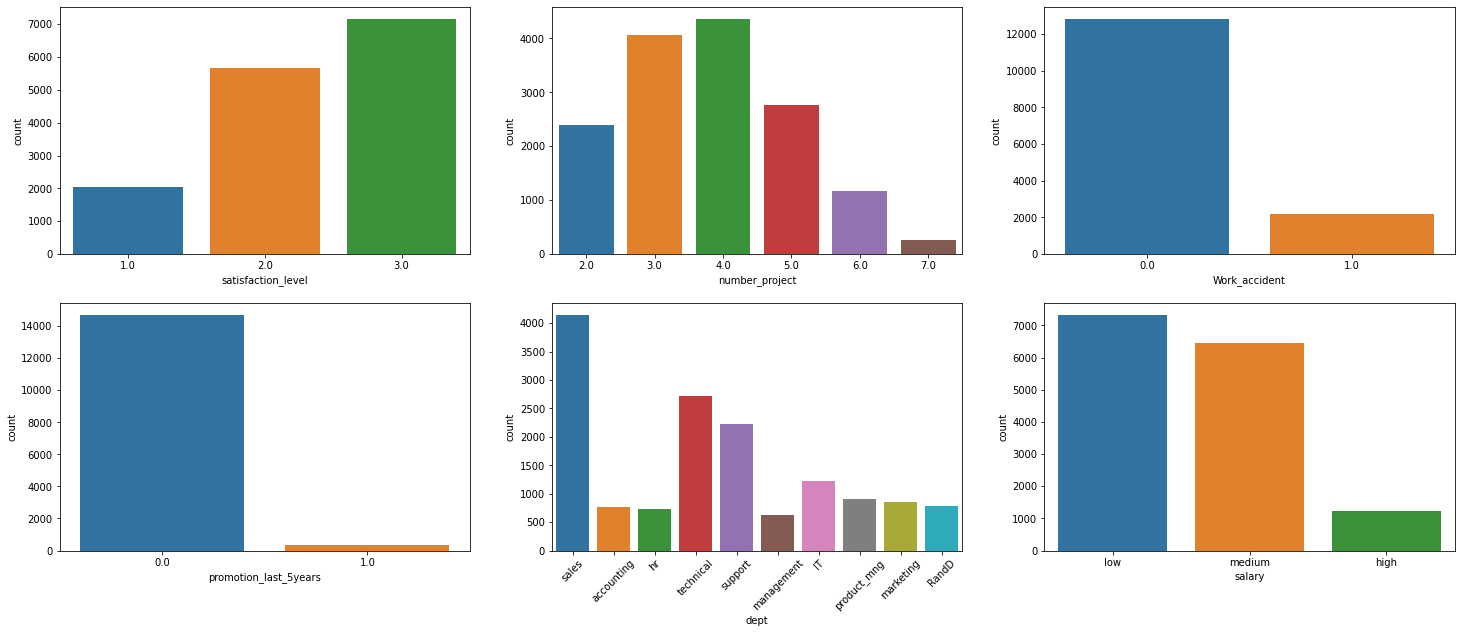

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.countplot(data = df, x ='satisfaction_level', ax=ax[0,0])
sns.countplot(data = df, x ='number_project', ax=ax[0,1])
sns.countplot(data = df, x ='Work_accident', ax=ax[0,2])
sns.countplot(data = df, x ='promotion_last_5years', ax=ax[1,0])
sns.countplot(data = df, x ='dept', ax=ax[1,1])
sns.countplot(data = df, x ='salary', ax=ax[1,2])

ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)

plt.show()  

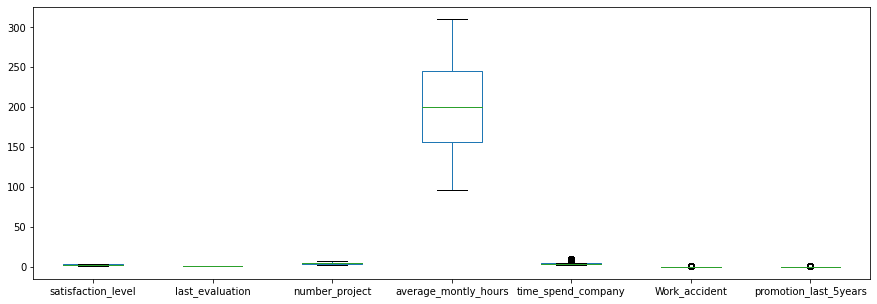

In [17]:
df.boxplot(figsize = (15,5), grid = False)
plt.show()

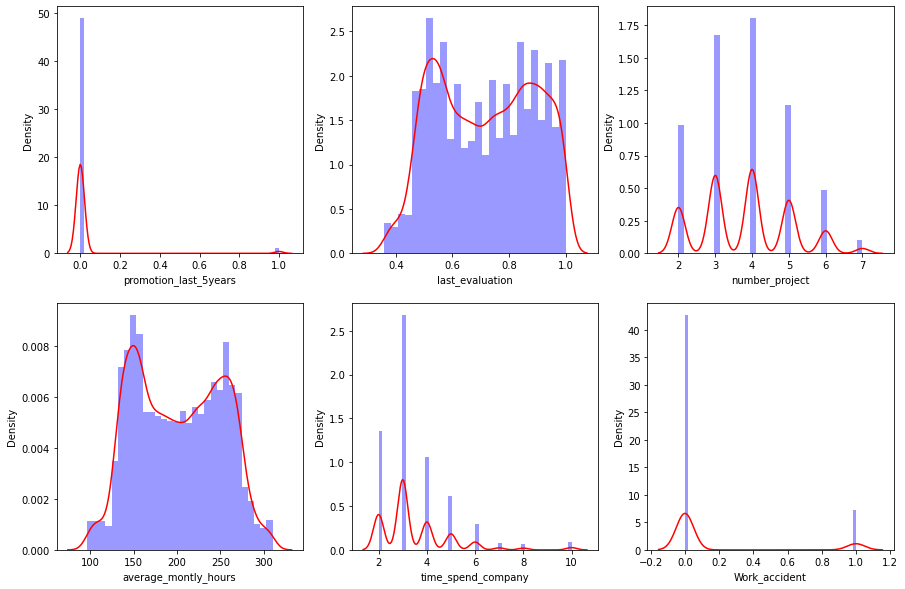

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.distplot(df['promotion_last_5years'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['last_evaluation'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['number_project'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['average_montly_hours'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['time_spend_company'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Work_accident'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

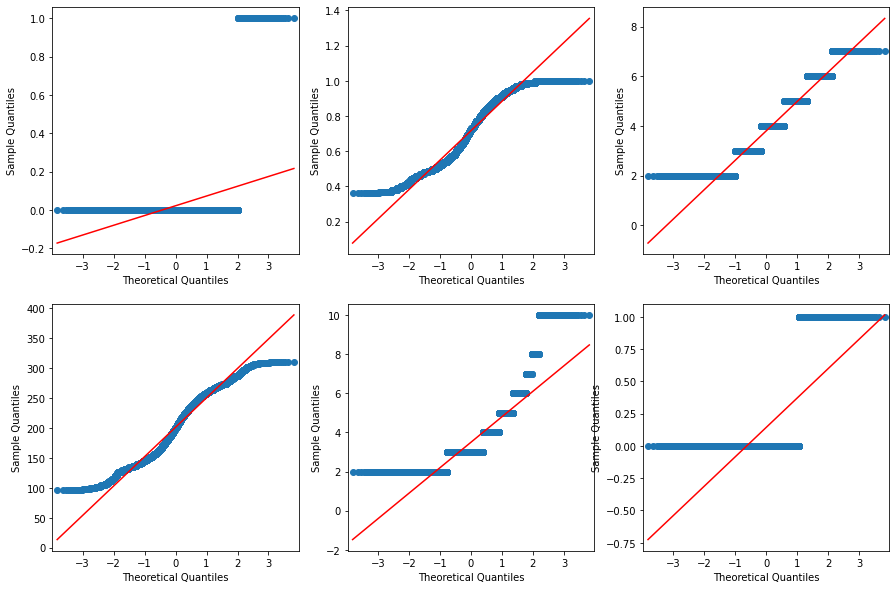

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

smi.qqplot(df['promotion_last_5years'],ax=ax[0,0], line = 'r')
smi.qqplot(df['last_evaluation'],ax=ax[0,1],  line = 'r')
smi.qqplot(df['number_project'],ax=ax[0,2],  line = 'r')
smi.qqplot(df['average_montly_hours'],ax=ax[1,0],  line = 'r')
smi.qqplot(df['time_spend_company'],ax=ax[1,1],  line = 'r')
smi.qqplot(df['Work_accident'],ax=ax[1,2],  line = 'r')

plt.show()

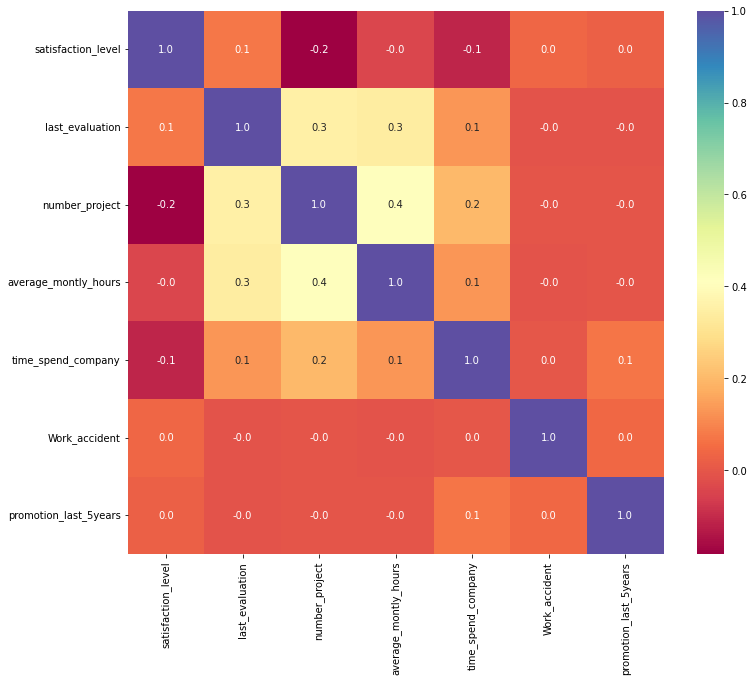

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'Spectral')
plt.show()

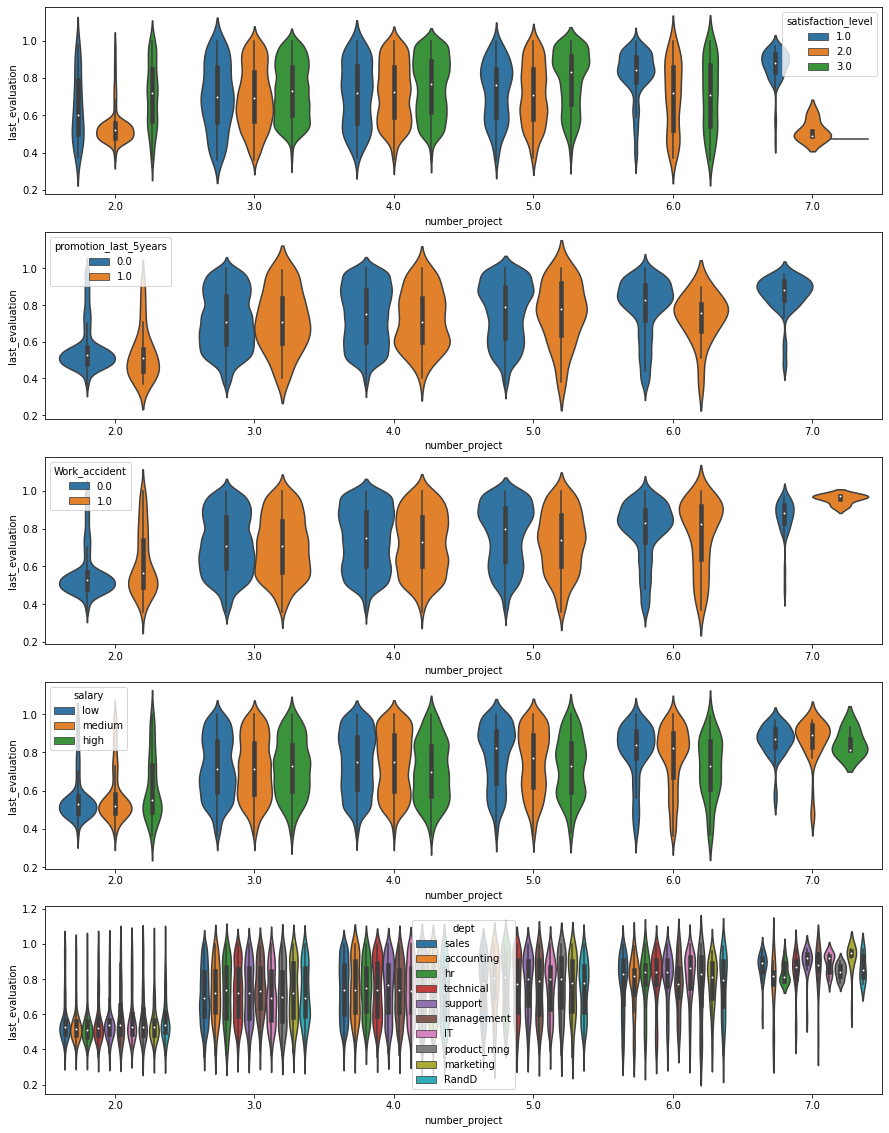

In [21]:
fig, ax = plt.subplots(5, 1, figsize=(15, 20))

sns.violinplot(data = df, x ='number_project', y='last_evaluation', hue = 'satisfaction_level',ax=ax[0])
sns.violinplot(data = df, x ='number_project', y='last_evaluation', hue = 'promotion_last_5years',ax=ax[1])
sns.violinplot(data = df, x ='number_project', y='last_evaluation', hue = 'Work_accident',ax=ax[2])
sns.violinplot(data = df, x ='number_project', y='last_evaluation', hue = 'salary',ax=ax[3])
sns.violinplot(data = df, x ='number_project', y='last_evaluation', hue = 'dept',ax=ax[4])

plt.show()

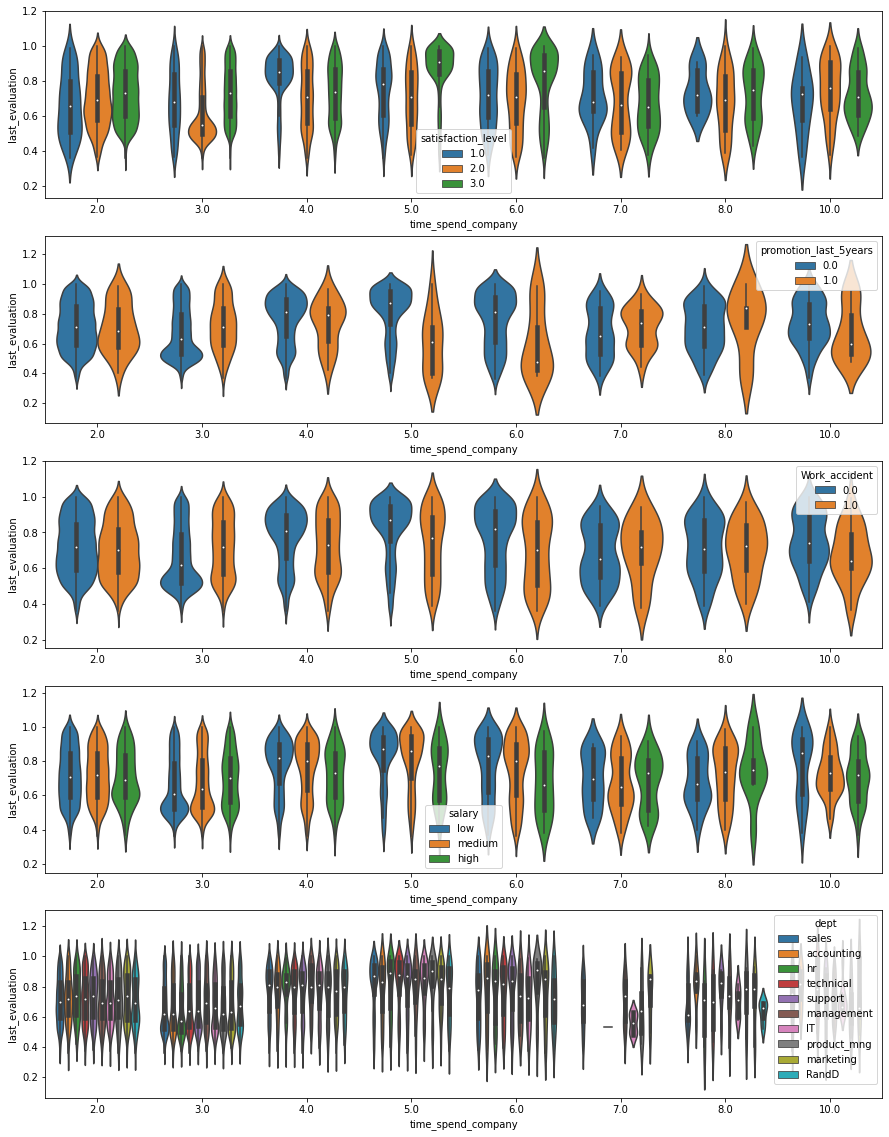

In [22]:
fig, ax = plt.subplots(5, 1, figsize=(15, 20))

sns.violinplot(data = df, x ='time_spend_company', y='last_evaluation', hue = 'satisfaction_level',ax=ax[0])
sns.violinplot(data = df, x ='time_spend_company', y='last_evaluation', hue = 'promotion_last_5years',ax=ax[1])
sns.violinplot(data = df, x ='time_spend_company', y='last_evaluation', hue = 'Work_accident',ax=ax[2])
sns.violinplot(data = df, x ='time_spend_company', y='last_evaluation', hue = 'salary',ax=ax[3])
sns.violinplot(data = df, x ='time_spend_company', y='last_evaluation', hue = 'dept',ax=ax[4])

plt.show()

In [ ]:
sns.pairplot(df, hue ='satisfaction_level', palette = 'viridis')
plt.show()

In [ ]:
lb = LabelEncoder()
df['salary'] = lb.fit_transform(df['salary'])
df['dept'] = lb.fit_transform(df['dept'])
df = df.dropna()
df.head(1)

In [ ]:
X_M = df.drop('satisfaction_level', axis = 1)
Y_M = df['satisfaction_level']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M) 


### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

### Logistic Regression

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

### Random Forest Classifier

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

### Decision Tree

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

### SVC

In [ ]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

### KNeighbors Classifier

In [ ]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

In [ ]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()